### Задание 1

Сгенерируйте $M=100$ выборок $X_1, ..., X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ (взять три произвольных положительных значения $\theta$). Для каждой выборки $X_1,\ldots,X_n$ для всех $n \leqslant 1000$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2 \overline{X}, (n + 1) X_{(1)}, X_{(1)} + X_{(n)}, \frac {n + 1} {n} X_{(n)}$. Посчитайте для всех полученых оценок $\hat\theta$ квадратичную функцию потерь $(\hat\theta-\theta)^2$ и для каждого фиксированного $n$ усредните по выборкам. Для каждого из трех значений $\theta$ постройте графики усредненных функций потерь в зависимости от $n$.

In [1]:
from matplotlib import pyplot as plt
import scipy.stats as sps
import numpy as np

M, N = 100, 1000
N_nums = np.arange(1, N+1)
M_nums = np.arange(1, M+1)
k = 4 # количество различных формул для оценки параметра theta

In [2]:
# генерируюет M выборок размера N из U[0; theta]
def generate_uniform(theta):
    return np.array([np.random.uniform(0, theta, size=N) for _ in M_nums])

In [3]:
# считает квадратичную функцию потерь для конкретной выборки с конкретным параметром
def quadratic_loss_function_calculating(sample, theta):
    
    # находим среднее для всех n <= N
    mean = np.divide(np.cumsum(sample), N_nums)
    
    # составляем массивы Х_(1) и Х_(n)
    X_1 = np.array([sample[0:n].min() for n in N_nums])
    X_n = np.array([sample[0:n].max() for n in N_nums])
    
    # считаем оценки параметра theta
    estimates = list()
    estimates.append(mean * 2)                      # 2 * mean(X)
    estimates.append(X_1 + X_n)                     # X_(1) + X_(n)
    estimates.append((N_nums + 1) * X_1)            # (n+1) * X_(1)
    estimates.append(X_n * (N_nums + 1) / N_nums)   # (n+1) / n * X_(n)
    
    # находим квадратичные функции потерь для всех оценок
    for i in range(k):
        estimates[i] = (estimates[i] - theta) ** 2
    
    return estimates

In [4]:
# для всех М выборок считает квадратичное отклонение оценки, возвращает усреднённое значение
def mean_deviation_square_calculating(theta):
    
    # генеририруем M выборок размера N
    samples = generate_uniform(theta)
    
    # список среднеквадратичных отклонений для различных функций оценки theta
    mean_deviations = list()
    for _ in range(k):
        mean_deviations.append(np.array([0.0] * N))
    
    # считаем квадратичное отклонение по всем выборкам и по всем оценкам
    for i in np.arange(M):
        deviations = quadratic_loss_function_calculating(samples[i], theta)
        for j in range(k):
            mean_deviations[j] += deviations[j]

    # усредняем
    for j in range(k):
        mean_deviations[j] = mean_deviations[j] / M
       
    return mean_deviations

In [5]:
# строит графики зависимости среднеквадратичного отклонения оценки theta в зависимости от размера выборки
def plotting(mean_deviations, flag):
    
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.xlabel("sample size", fontsize=15)
    plt.ylabel("mean deviation square", fontsize=15)
    
    plt.plot(N_nums, mean_deviations[0], label='2 * mean(X)')
    plt.plot(N_nums, mean_deviations[1], label='X_(1) + X_(n)')
    if flag:
        plt.plot(N_nums, mean_deviations[2], label='(n+1) * X_(1)')
    plt.plot(N_nums, mean_deviations[3], label='(n+1) / n * X_(n)')

    plt.legend()
    plt.show()

In [6]:
# находим среднеквадратичные отклонения и строим графики
def solution(theta = 1, flag_for_show_bad_estimation = True):
    
    mean_deviations = mean_deviation_square_calculating(theta)
    plotting(mean_deviations, flag_for_show_bad_estimation)

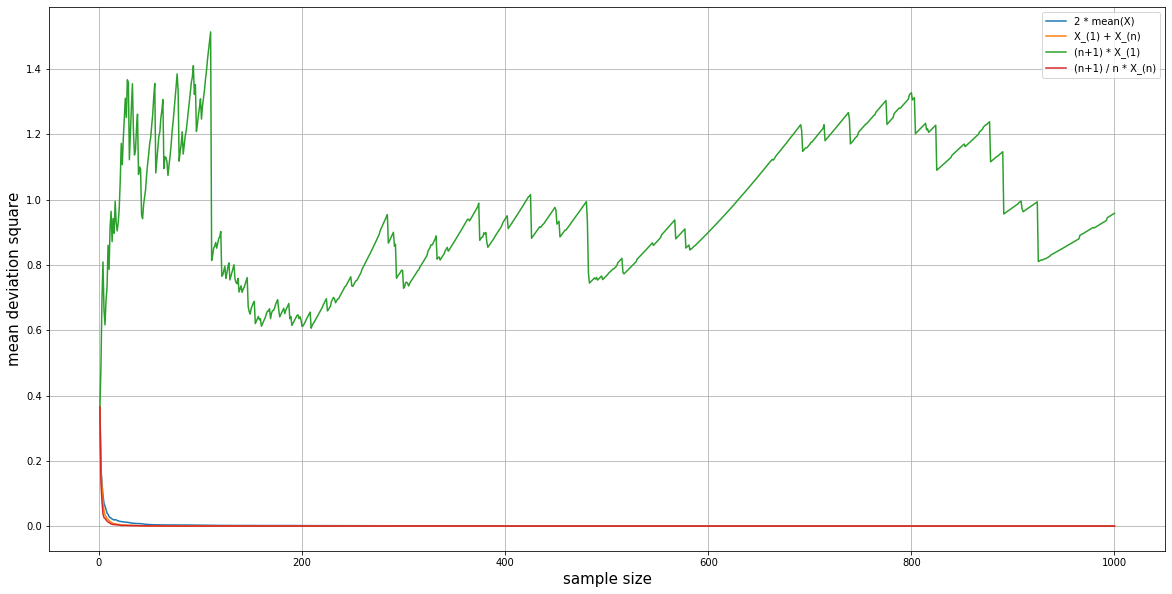

In [7]:
solution(1)

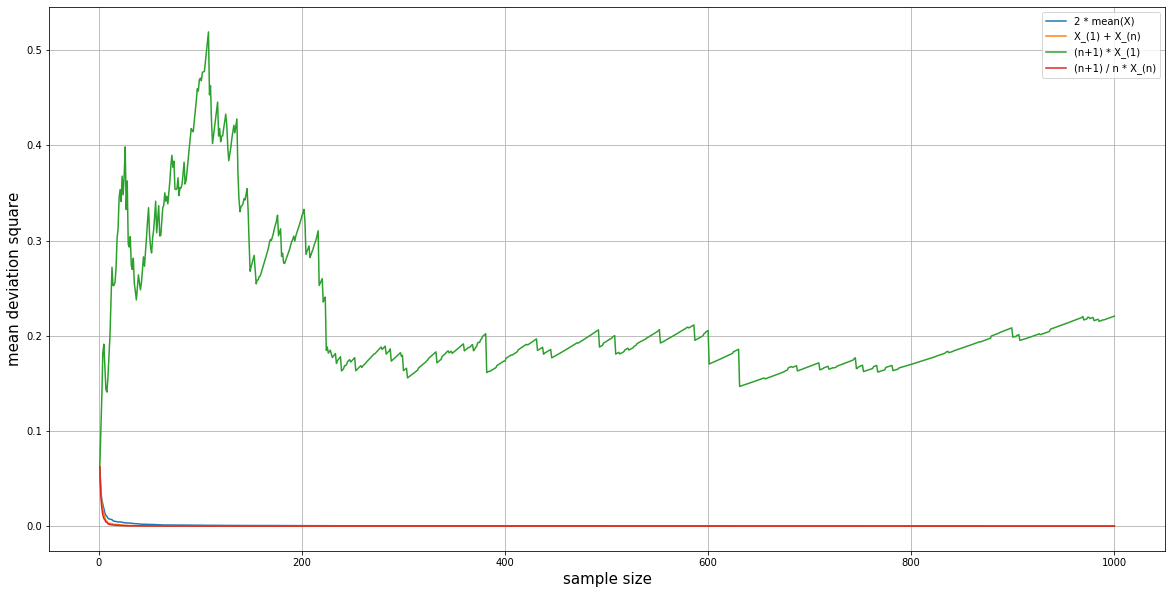

In [8]:
solution(0.5)

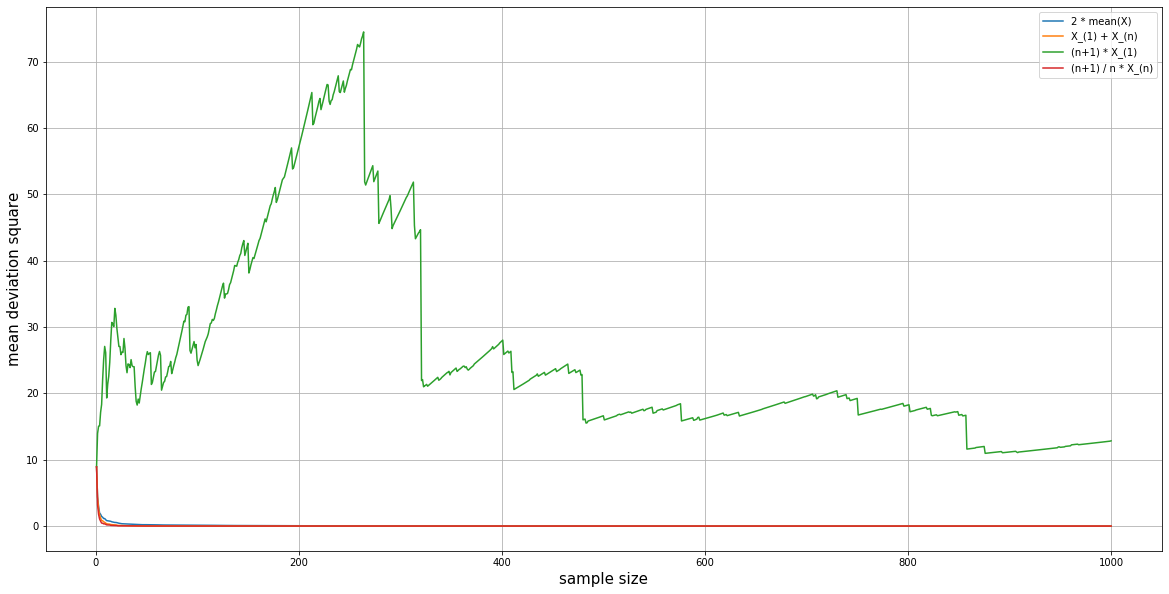

In [9]:
solution(5)

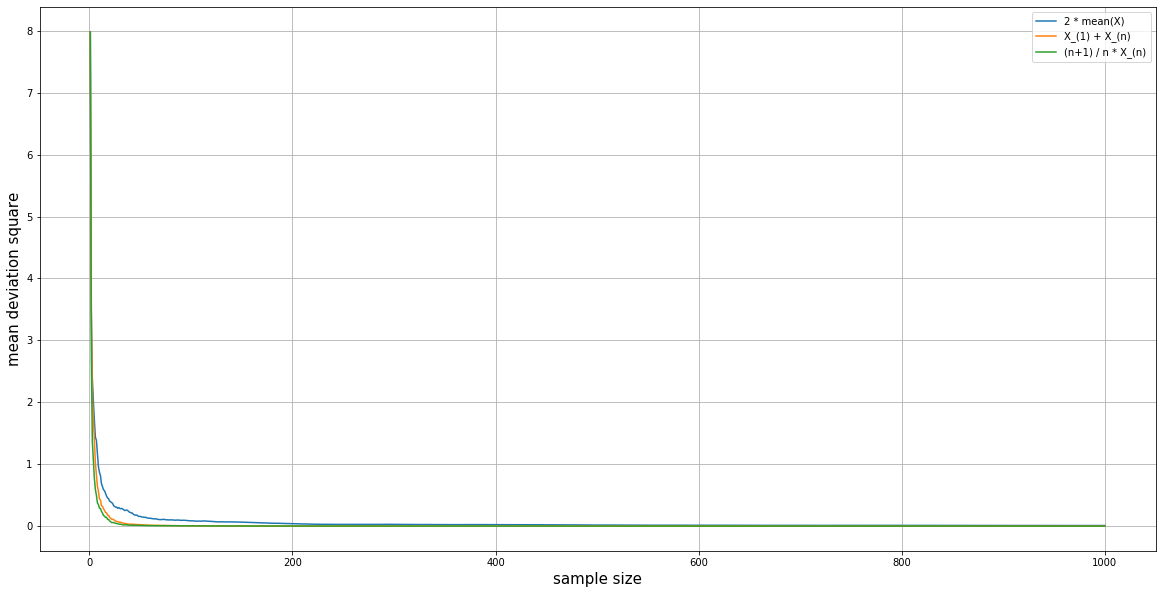

In [10]:
solution(5, False)

$\textbf{Вывод:}$ как мы видим, среднеквадратичное отклонение оценки $\theta = (n+1)X_{(1)}$ много больше среднеквадратичных отклонений остальных оценок (в некоторых случаях это значение даже превышает действительного значения оценки). Это связано с тем, что данная оценка не является состоятельной. Также среднеквадратичное отклонение оценки $\frac{n+1}{n}X_{(n)}$ меньше среднеквадратичного отклонения оценки $X_{(1)} + X_{(n)}$, которое в свою очередь меньше отклонения оценки $2\overline{X}$. Это согласуется с результатами первого практикума, где мы могли видеть, что оценка $\frac{n+1}{n}X_{(n)}$ сходилась к действительному значению параметра лучше, чем оценка $X_{(1)} + X_{(n)}$, которая сходилась лучше чем $\frac{n+1}{n}X_{(n)}$.

### Задание 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. Какой можно сделать вывод напишите в комментариях)? Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (параметрический бутстреп, количество утстрепных выборок равно $500$) этой эффективной оценки $\theta$. Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

Из неравенства Рао-Крамера: $D_{\theta}\theta^{*} \geq \frac{(\tau^\prime(\theta))^2}{ni(\theta)}$ (равенство достигается только в том случае, когда $\theta$ - несмещённая оценка, наилучшая в среднеквадратичном подходе в классе всех несмещённых оценок).

Для распределения Бернулли: $i(\theta) = \frac{1}{\theta (1 - \theta)}$.

Ищем оценку параметра $\theta$ $\Rightarrow$ $\tau(\theta) = \theta$ $\Rightarrow$ $\tau'(\theta) = 1$.

Тогда $\min D_{\theta}\theta^{*} = \frac{\theta (1 - \theta)}{n}$ $\Rightarrow$ наибольшее значение дисперсии имеет оценка параметра при $\theta = \frac{1}{2}$. 

Для распределения Бернулли $\overline{X} -$ эффективная оценка $\theta$.

In [11]:
n = 1000 # размер выборки
Theta = np.arange(0, 1.01, 0.01)
K = 500 # кол-во бутстрепных выборок
K_nums = np.arange(1, K+1)

In [12]:
# строит график зависимости function от theta
def plotting(function):

    plt.figure(figsize=(20,10))
    plt.grid()
    plt.xlabel('theta', fontsize=15)
    plt.ylabel('disp of best param estimation', fontsize=15)

    plt.plot(Theta, function)
    plt.show()

In [13]:
# считает бутстрепную оценку дисперсии оценки theta
def bootstrap_estimation(theta):
    
    # генерируем выборку размера n из распределения Бернулли с параметром theta
    sample = sps.bernoulli.rvs(theta, size=n)
    
     # эффективная оценка theta
    X_mean = np.sum(sample) / n
    
    # сгенерируем K бутстрепных выборок размера n в параметрическом бутстрепе
    bootstrap_sample = np.array([sps.bernoulli.rvs(X_mean, size=n) for _ in K_nums])
    
    # считаем бутстрепную оценку дисперсии оценки theta
    bootstrap_mean = np.array([np.sum(bootstrap_sample[i]) / n for i in np.arange(K)])
    disp_of_bootstrap_mean = np.sum(bootstrap_mean ** 2) / K - (np.sum(bootstrap_mean) / K) ** 2
    
    return disp_of_bootstrap_mean

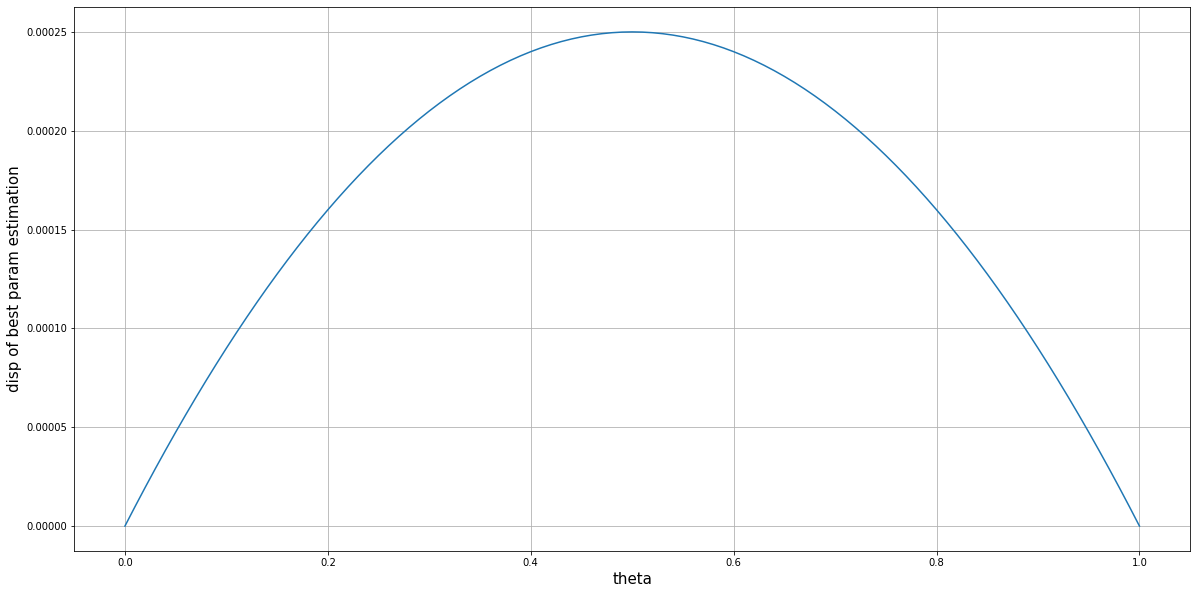

In [14]:
plotting(Theta * (1 - Theta) / n)

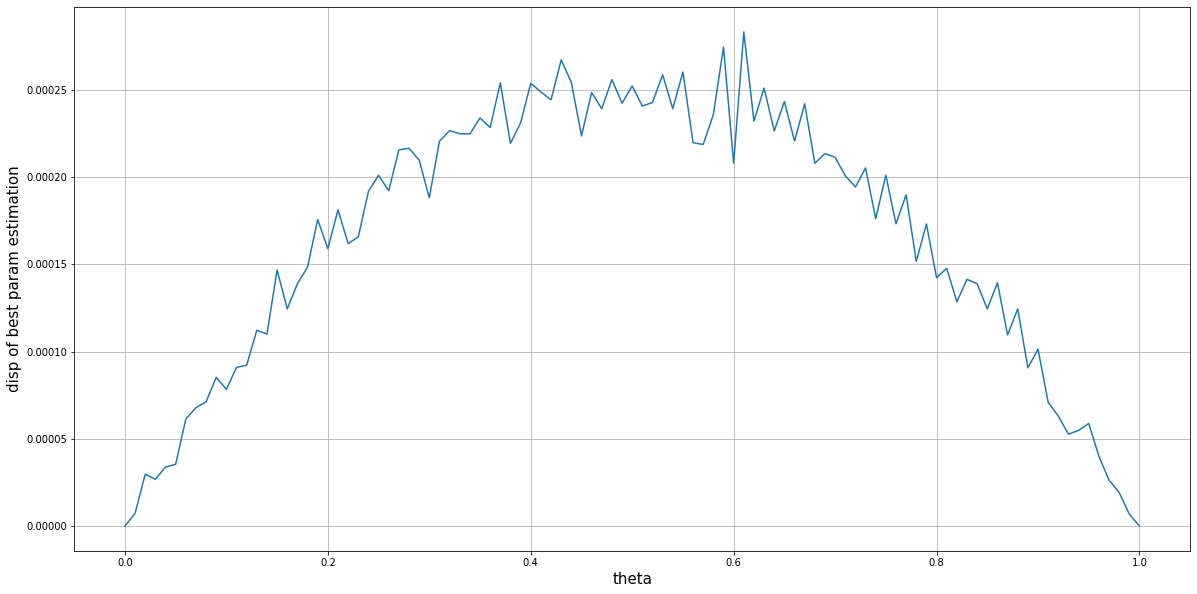

In [15]:
disp_of_bootstrap_theta = np.array([0.0] * Theta.size)
for i in np.arange(Theta.size):
    disp_of_bootstrap_theta[i] = bootstrap_estimation(Theta[i])
    
plotting(disp_of_bootstrap_theta)

$\textbf{Вывод:}$ для эффективной оценки параметра $\theta$ мы можем наблюдать достижение нижней оценки дисперсии несмещённой оценки из неравенства Рао-Крамера. Также дисперсия эффективной оценки на несколько порядков меньше самого значения оценки, это значит, что найденное значение оценки близко к действительному. 

### Задание 2

В задаче требуется экспериментально проверить утверждение, что для любой несмещенной оценки $\widehat{\theta} (X)$ параметра $\theta$ выполнено неравенство Рао-Крамера:
$$\mathsf{D}_{\theta} \widehat{\theta} (X) \geqslant \frac {1} {I_X (\theta)}.$$
Cгенерируйте выборку $X_1, ..., X_N$, $N=1000$, из распределений в теоретических задачах (распределение Бернулли, экспоненциальное распределение и нормальное распределение с неизвестным математическим ожиданием). В случае биномиального распределения $m=50$, в случае нормального распределения с неизвестным математическим ожиданием $\sigma^2=2.1$. Второй параметр (единственный в случае экспоненциального распределения) выберите случайно из распределения $R[0,1]$. Для всех $n \leqslant N$ посчитайте значение эффективной оценки и бутстрепную оценку дисперсии для эффективной оценки (параметрический бутстреп, количество бутстрепных выборок равно $500,$ размер каждой равен $n$). Сделайте то же самое с другой несмещенной оценкой: в задаче 3 возьмите $\frac{X_1}{m}$, в задаче 4 возьмите $\frac{n-1}{n\overline{X}}$, в задаче 5 возьмите выборочную медиану. Постройте графики зависимости бутстрепных оценок дисперсий от размера выборки $n$. Для каждой бутстрепной оценки постройте на том же графике кривую зависимости $\frac {1} {I_X (\theta)}$ от $n.$

In [16]:
N = 1000         # размер выборки
M = 500          # кол-во бутстепных выборок
m = 50.0         # первый параметр для бин. распр.
sigma = 2.1      # первый параметр для норм. распр
M_nums = np.arange(0, M)
N_nums = np.arange(1, N+1)

$\textbf{Биномиальное распределение}$

Эффективная оценка параметра $p$ для биномиального распределения: $p = \frac{\overline{X}}{m}$

Из теоретической задачи: $i(\theta) = \frac{m}{\theta (1 - \theta)}$ $\Rightarrow$ $\frac{1}{I_X(\theta)} = \frac{\theta (1 - \theta)}{mn}$

In [17]:
# генерируем параметр p для биномиального распределения
p = np.random.uniform(0, 1)

# генерируем выборку из биномиального распределения размера N
uniform_sample = np.random.binomial(m, p, size=N)

# находим эффективную оценку p
efficient_estimator = np.divide(np.cumsum(uniform_sample), N_nums) / m

In [18]:
# находит бутстрепную оценку дисперсии n-ой эффективной оценки
def bootstrap_estimator(n):

    # для n-ой оценки генерируем M бутстрепный выборок размера n
    bootstrap_samples = np.array([np.random.binomial(m, efficient_estimator[n-1], size=n) for _ in M_nums])

    # находим бутстрепную оценку параметра p
    bootstrap_p = np.array([np.sum(bootstrap_samples[i]) / n for i in M_nums]) / m

    # и дисперсию оценки
    disp_of_bootstrap_p = np.sum(bootstrap_p ** 2) / M - (np.sum(bootstrap_p) / M) ** 2

    return disp_of_bootstrap_p

In [19]:
disp_of_bootstrap_param = [0.0] * (N+1)
for n in N_nums:
    disp_of_bootstrap_param[n] = bootstrap_estimator(n)

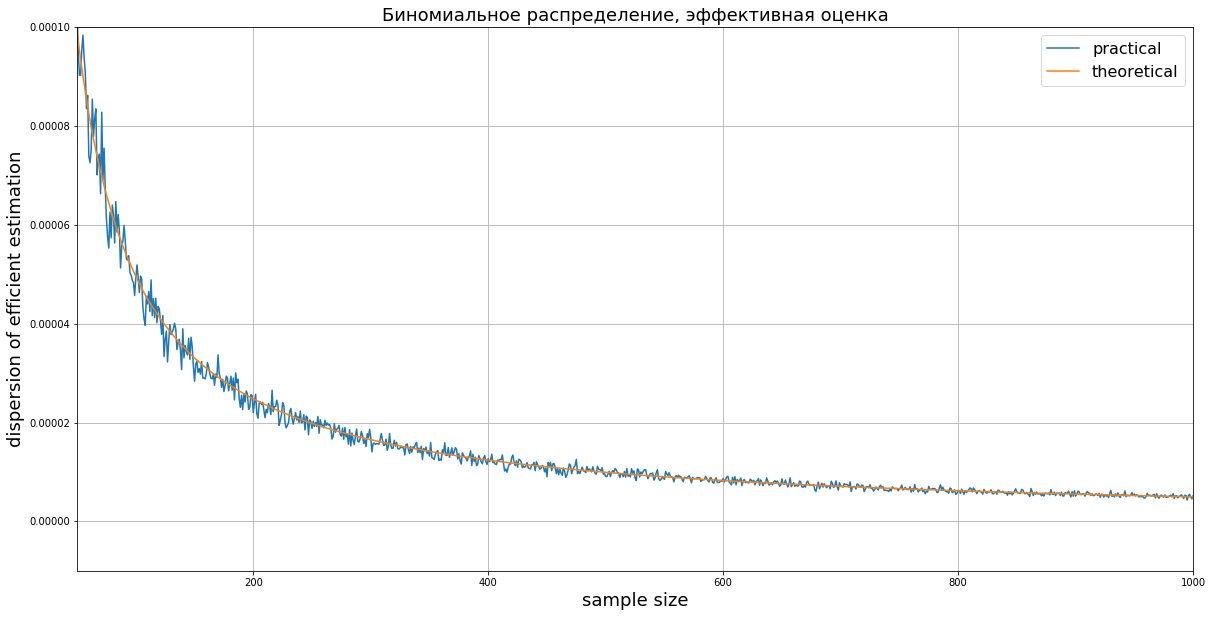

In [20]:
# находим нижнюю границу оценки дисперсии
inverse_fisher_inf = np.divide(efficient_estimator * (1 - efficient_estimator), N_nums) / m
disp_of_bootstrap_p = np.array(disp_of_bootstrap_param[1:N+1])

# строим графики
plt.figure(figsize=(20, 10))
plt.grid()

plt.xlabel('sample size', fontsize=18)
plt.ylabel('dispersion of efficient estimation', fontsize=18)

plt.plot(N_nums, disp_of_bootstrap_p, label='practical')
plt.plot(N_nums, inverse_fisher_inf, label='theoretical')

plt.ylim(-0.00001,0.0001)
plt.xlim(50, 1000)

plt.title(u'Биномиальное распределение, эффективная оценка', fontsize=18)
plt.legend(fontsize=16)
plt.show()

Теперь рассмотрим другую несмещённую, но уже не эффективную оценку параметра $p = \frac{X_1}{m}$

In [21]:
not_efficient_estimator = uniform_sample[0] / m

In [22]:
# находит бутстрепную оценку дисперсии n-ой неэффективной оценки
def bootstrap_estimator(n):

    # поскольку от каждой бутстрепной выборки нам требуется только первый элемент, мы не будем генерировать всю выборку
    # таким образом мы можем сразу найти бутстрепные оценки параметра p
    bootstrap_p = np.array([np.random.binomial(m, not_efficient_estimator) for _ in M_nums]) / m
    
    # и дисперсию оценки
    disp_of_bootstrap_p = np.sum(bootstrap_p ** 2) / M - (np.sum(bootstrap_p) / M) ** 2

    return disp_of_bootstrap_p

In [23]:
disp_of_bootstrap_param = [0.0] * N
for n in N_nums:
    disp_of_bootstrap_param[n-1] = bootstrap_estimator(n)

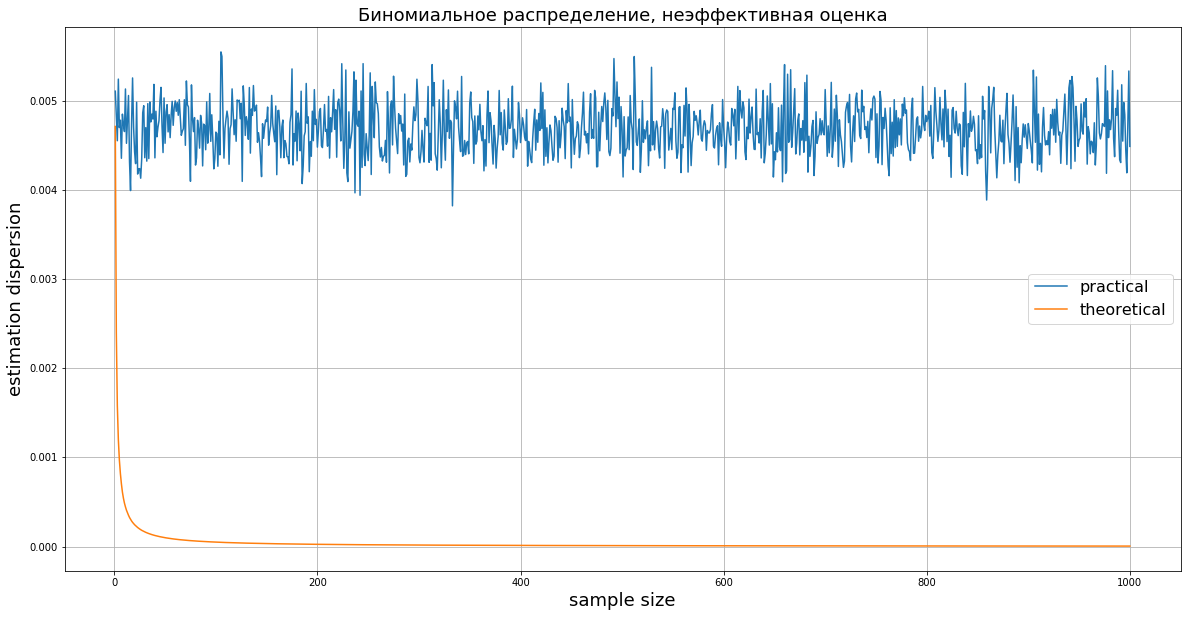

In [24]:
# строим графики
plt.figure(figsize=(20, 10))
plt.grid()

plt.xlabel('sample size', fontsize=18)
plt.ylabel('estimation dispersion', fontsize=18)

plt.plot(N_nums, disp_of_bootstrap_param, label='practical')
plt.plot(N_nums, inverse_fisher_inf, label='theoretical')

plt.title(u'Биномиальное распределение, неэффективная оценка', fontsize=18)
plt.legend(fontsize=16)
plt.show()

$\textbf{Нормальное распределение}$

Эффективная оценка параметра $a = \overline{X}$

Информация Фишера одного элемента $i(\theta) = \frac{1}{\sigma^2}$
$\Rightarrow$ $\frac{1}{I_X(\theta)} = \frac{\sigma^2}{n}$

In [25]:
# генерируем параметр а для нормального распределения
a = np.random.uniform(0,1)

# генерируем выборку из нормального распределения размера N
normal_sample = np.random.normal(a, sigma ** (0.5), size=N)

# находим эффективную оценку параметра а
efficient_estimator = np.divide(np.cumsum(normal_sample), N_nums)

In [26]:
# находит бутстрепную оценку дисперсии n-ой эффективной оценки
def bootstrap_estimator(n):

    # для n-ой оценки генерируем M бутстрепный выборок размера n
    bootstrap_sample = np.array([np.random.normal(efficient_estimator[n-1], sigma ** (0.5), size=n) for _ in M_nums])

    # находим бутстрепную оценку параметра a
    bootstrap_a = np.array([np.sum(bootstrap_sample[i]) / n for i in M_nums])

    # и дисперсию оценки
    disp_of_bootstrap_a = np.sum(bootstrap_a ** 2) / M - (np.sum(bootstrap_a) / M) ** 2
    
    return disp_of_bootstrap_a

In [27]:
disp_of_bootstrap_param = [0.0] * (N+1)
for n in N_nums:
    disp_of_bootstrap_param[n] = bootstrap_estimator(n)

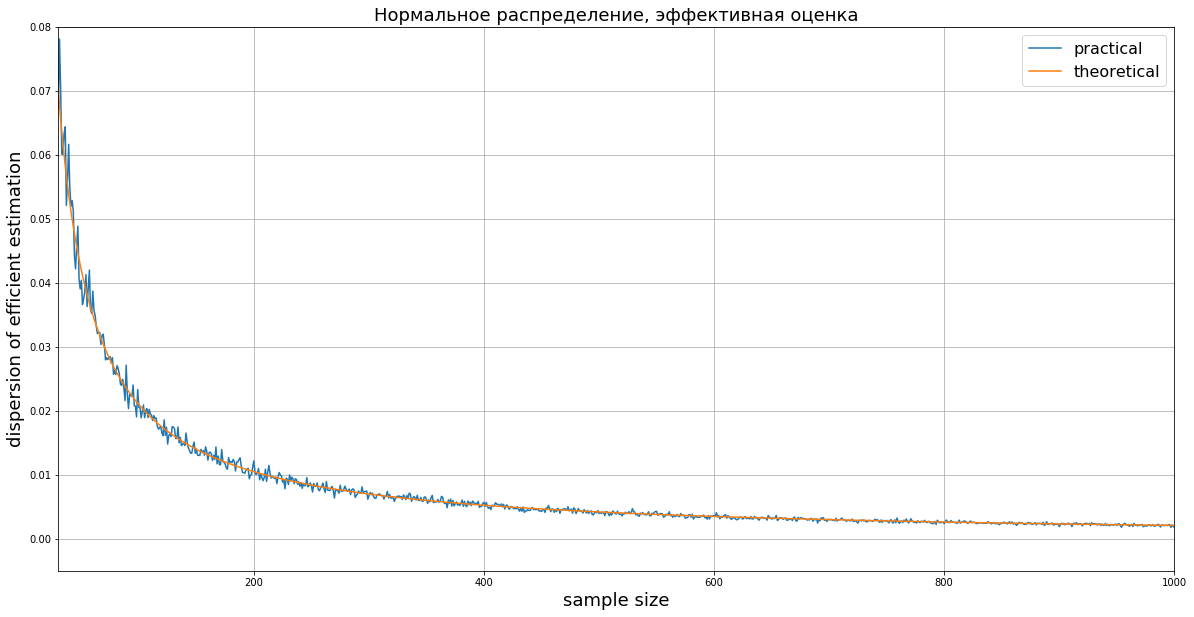

In [28]:
# находим нижнюю границу оценки дисперсии
inverse_fisher_inf = sigma / N_nums
disp_of_bootstrap_a = np.array(disp_of_bootstrap_param[1:N+1])

# строим графики
plt.figure(figsize=(20, 10))
plt.grid()

plt.xlabel('sample size', fontsize=18)
plt.ylabel('dispersion of efficient estimation', fontsize=18)

plt.plot(N_nums, disp_of_bootstrap_a, label='practical')
plt.plot(N_nums, inverse_fisher_inf, label='theoretical')

plt.ylim(-0.005,0.08)
plt.xlim(30, 1000)

plt.title(u'Нормальное распределение, эффективная оценка', fontsize=18)
plt.legend(fontsize=16)
plt.show()

Рассмотрим неэффективную оценку параметра: $a = \frac{X_{(n / 2)} + X_{(n / 2 + 1)}}{2}$ при $n \vdots 2$ и $a = X_{(\frac{n+1}{2})}$ иначе.

In [29]:
# находит бутстрепную оценку дисперсии n-ой неэффективной оценки
def bootstrap_estimator(n):

    sorted_sample = np.sort(normal_sample[0:n])

    if n % 2 == 0:
        i_1, i_2 = int(n / 2 - 1), int(n / 2)
    else:
        i_1 = i_2 = int((n + 1) / 2 - 1)

    not_efficient_estimator = (sorted_sample[i_1] + sorted_sample[i_2]) / 2

    # для n-ой оценки генерируем M бутстрепный выборок размера n
    bootstrap_sample = np.array([np.sort(np.random.normal(not_efficient_estimator, sigma ** (0.5), size=n)) for _ in M_nums])

    # находим бутстрепную оценку параметра a
    bootstrap_a = np.array([(bootstrap_sample[i][i_1] + bootstrap_sample[i][i_2]) / 2 for i in M_nums])

    # и дисперсию оценки
    disp_of_bootstrap_a = np.sum(bootstrap_a ** 2) / M - (np.sum(bootstrap_a) / M) ** 2

    return disp_of_bootstrap_a

In [30]:
disp_of_bootstrap_param = [0.0] * (N+1)
for n in N_nums:
    disp_of_bootstrap_param[n] = bootstrap_estimator(n)

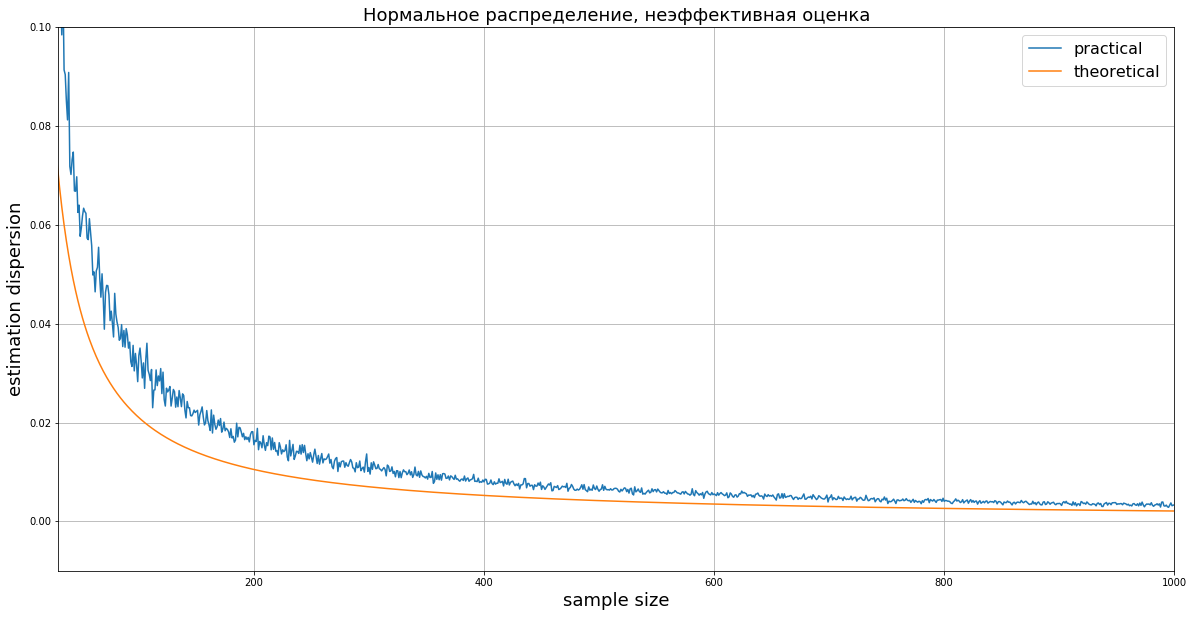

In [31]:
disp_of_bootstrap_a = np.array(disp_of_bootstrap_param[1:N+1])

# строим графики
plt.figure(figsize=(20, 10))
plt.grid()

plt.xlabel('sample size', fontsize=18)
plt.ylabel('estimation dispersion', fontsize=18)

plt.plot(N_nums, disp_of_bootstrap_a, label='practical')
plt.plot(N_nums, inverse_fisher_inf, label='theoretical')
plt.title(u'Нормальное распределение, неэффективная оценка', fontsize=18)

plt.ylim(-0.01,0.1)
plt.xlim(30, 1000)

plt.legend(fontsize=16)
plt.show()

$\textbf{Экспоненциальное распределение}$

Эффективная оценка параметра $\theta = \frac{1}{\overline{X}}$

Информация Фишера одного элемента $i(\theta) = \frac{1}{\theta^2}$ $\Rightarrow$ $\frac{1}{I_X(\theta)} = \frac{\theta^2}{n}$

In [43]:
# генерируем параметр theta для экспоненциального распределения
theta = np.random.uniform(0,1)

# генерируем выборку из экспоненциального распределения размера N
exp_sample = np.random.exponential(1. / theta, size=N)

# находим эффективную оценку параметра theta
efficient_estimator = np.divide(N_nums, np.cumsum(exp_sample))

In [40]:
# находит бутстрепную оценку дисперсии n-ой эффективной оценки
def bootstrap_estimator(n):

    # для n-ой оценки генерируем M бутстрепный выборок размера n
    bootstrap_sample = np.array([np.random.exponential(1. / efficient_estimator[n-1], size=n) for _ in M_nums])

    # находим бутстрепную оценку параметра theta
    bootstrap_theta = np.array([n / np.sum(bootstrap_sample[i]) for i in M_nums])

    # и дисперсию оценки
    disp_of_bootstrap_theta = np.sum(bootstrap_theta ** 2) / M - (np.sum(bootstrap_theta) / M) ** 2
    
    return disp_of_bootstrap_theta

In [44]:
disp_of_bootstrap_param = [0.0] * (N+1)
for n in N_nums:
    disp_of_bootstrap_param[n] = bootstrap_estimator(n)

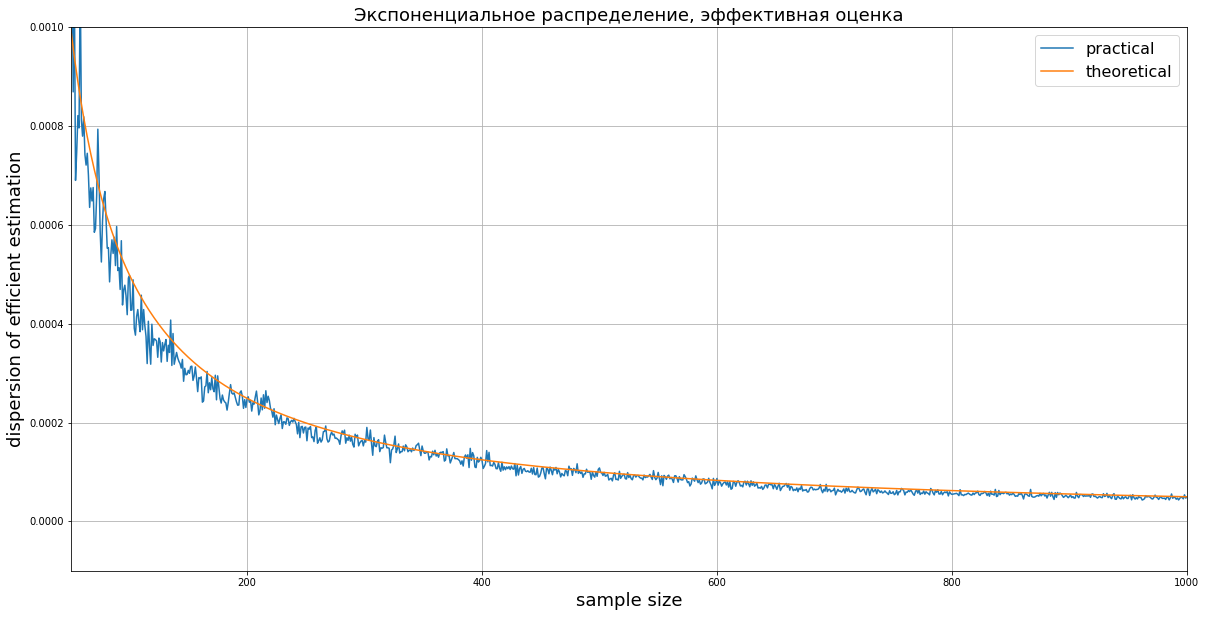

In [45]:
# находим нижнюю границу оценки дисперсии
inverse_fisher_inf = theta * theta / N_nums
disp_of_bootstrap_theta = np.array(disp_of_bootstrap_param[1:N+1])

# строим графики
plt.figure(figsize=(20, 10))
plt.grid()

plt.xlabel('sample size', fontsize=18)
plt.ylabel('dispersion of efficient estimation', fontsize=18)

plt.plot(N_nums, disp_of_bootstrap_theta, label='practical')
plt.plot(N_nums, inverse_fisher_inf, label='theoretical')

plt.ylim(-0.0001,0.001)
plt.xlim(50, 1000)

plt.title(u'Экспоненциальное распределение, эффективная оценка', fontsize=18)
plt.legend(fontsize=16)
plt.show()

Рассмотрим неэффективную оценку параметра: $theta = \frac{1}{X_1}$

In [46]:
# находит бутстрепную оценку дисперсии n-ой неэффективной оценки
def bootstrap_estimator(n):

    # поскольку от каждой бутстрепной выборки нам требуется только первый элемент, мы не будем генерировать всю выборку
    # таким образом мы можем сразу найти бутстрепные оценки параметра theta
    bootstrap_theta = np.array([np.random.exponential(efficient_estimator[0]) for _ in M_nums])

    # и дисперсию оценки
    disp_of_bootstrap_theta = np.sum(bootstrap_theta ** 2) / M - (np.sum(bootstrap_theta) / M) ** 2

    return disp_of_bootstrap_theta

In [47]:
disp_of_bootstrap_param = [0.0] * N
for n in N_nums:
    disp_of_bootstrap_param[n-1] = bootstrap_estimator(n)

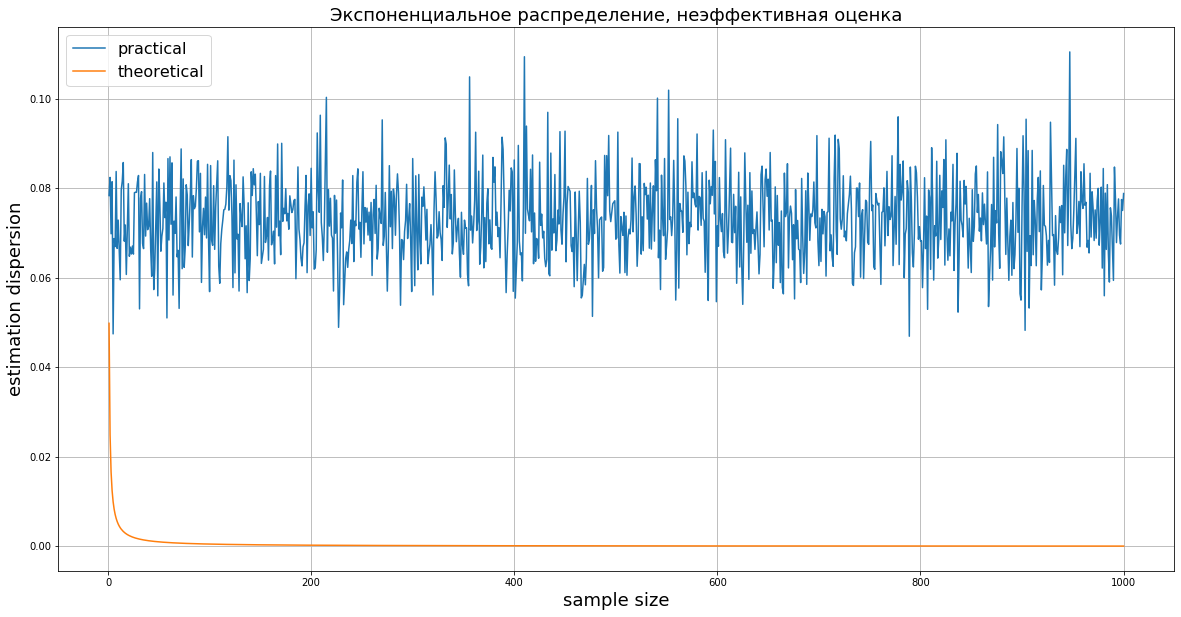

In [48]:
# строим графики
plt.figure(figsize=(20, 10))
plt.grid()

plt.xlabel('sample size', fontsize=18)
plt.ylabel('estimation dispersion', fontsize=18)

plt.plot(N_nums, disp_of_bootstrap_param, label='practical')
plt.plot(N_nums, inverse_fisher_inf, label='theoretical')

plt.title(u'Экспоненциальное распределение, неэффективная оценка', fontsize=18)
plt.legend(fontsize=16)
plt.show()

$\textbf{Вывод:}$ полученные результаты согласуются с теорией: оценки $p = \frac{\overline{X}}{m}$, $a = \overline{X}$, $\theta = \frac{1}{\overline{X}}$ являются эффективными для биномиального, нормального и экспоненциального распределений соответственно, поскольку для них неравенство Рао-Крамера обращается в равенство. Для остальных рассмотренных оценок дисперсия действительно оказалась больше.